# Undesrtanding A Pesistence Homology Matrix
In this example, we will look at a reduced matrix of smith normal form to understand the births and deaths of cycles in persistence homology computation. Large part of this example is a commentary of the following thread on dionysus [forum.](https://groups.io/g/dionysus/topic/representatives_of_bars/32216531?p=,,,20,0,0,0::recentpostdate%2Fsticky,,,20,2,0,32216531)

This tutorial requires successful installation of dionysus2 and a decent understanding of homology groups, cycles and boundaries. We use Vietoris-Rips simplicial complex formation for filtration.

NOTE:  Part of this notebook focuses on computing vertices in each bar. This requires the package `networkx`

In [1]:
import dionysus as dion
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd


In [2]:
# First create a square as our data set
A = []
for i in [-1,1]:
    for j in [-1, 1]:
        cv = [i, i]
        cv[1] *= j
        A.append(cv)
A = np.array(A, float)
print(A)

[[-1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [ 1.  1.]]


In [3]:
# Compute relevant VR complex using dionysus Rips function
filtration = dion.fill_rips(A, 3, 3.0)
print(filtration)
for simplex in filtration:
    print(simplex)

Filtration with 15 simplices
<0> 0
<1> 0
<2> 0
<3> 0
<0,1> 2
<0,3> 2
<1,2> 2
<2,3> 2
<0,2> 2.82843
<1,3> 2.82843
<0,1,2> 2.82843
<0,1,3> 2.82843
<0,2,3> 2.82843
<1,2,3> 2.82843
<0,1,2,3> 2.82843


Now we compute a persistence homology and express each filtration interms of its birth and death time.

Following rules are used to read off the persistence diagram printed below:
1. We use the colon operator to differentiate stuff that is happening before and after the addition of a particular simplex
2. Items printed after the colon indicate the `cycles` that were zero before the addition of `simplex` printed before the colon

Now let us look at the homology reduce matrix to understanding the `birth` and `deaths` of cycles.

Following will serve as a basic introduction to a homology group:
1. A `p-chain` is a formal sum of `p-simplicies` in a simplicial complex with coeffients in any field
2. Boundary of any p-simplex is a sum of (p-1)-dimensional faces
3. A `p-cycle` is a p-chain with empty boundary.
4. A group of p-cycles is the kernel of pth boundary homomorphisms $Z_p = Ker (\delta_p)$. For example, a 0-cycle is a collection of vertices because boundary of each vertex is zero. Equivalently, for any simplex, 0-cycle is complete set of vertices.
5. A `pth-homology group` is pth-cycle group modulo p-th boundary groupn $H_p = Z_p / B_p$ where $B_p$ is pth-boundary group

In [4]:
# compute persistent homology
hfp = dion.homology_persistence(filtration)
 
for i,c in enumerate(hfp):
    print(filtration[i],end=': ')
    print(" + ".join(["%d * %s" % (x.element, filtration[x.index]) for x in c]))

<0> 0: 
<1> 0: 
<2> 0: 
<3> 0: 
<0,1> 2: 1 * <0> 0 + 1 * <1> 0
<0,3> 2: 1 * <0> 0 + 1 * <3> 0
<1,2> 2: 1 * <1> 0 + 1 * <2> 0
<2,3> 2: 
<0,2> 2.82843: 
<1,3> 2.82843: 
<0,1,2> 2.82843: 1 * <0,1> 2 + 1 * <1,2> 2 + 1 * <0,2> 2.82843
<0,1,3> 2.82843: 1 * <0,1> 2 + 1 * <0,3> 2 + 1 * <1,3> 2.82843
<0,2,3> 2.82843: 1 * <0,1> 2 + 1 * <0,3> 2 + 1 * <1,2> 2 + 1 * <2,3> 2
<1,2,3> 2.82843: 
<0,1,2,3> 2.82843: 1 * <0,1,2> 2.82843 + 1 * <0,1,3> 2.82843 + 1 * <0,2,3> 2.82843 + 1 * <1,2,3> 2.82843


Let us now look at sections of the printed reduced boundary matrix:
```
<0> 0: 
<1> 0: 
<2> 0: 
<3> 0:
```
Meaning of the above section is that, at $\ell=0$, four `vertices` are created and the all act as `0-cycles`.

```
<0,1> 2: 1 * <0> 0 + 1 * <1> 0
<0,3> 2: 1 * <0> 0 + 1 * <3> 0
<1,2> 2: 1 * <1> 0 + 1 * <2> 0
<2,3> 2: 
<0,2> 2.82843: 
<1,3> 2.82843:
```
This section contains addition of all the `1-simplices` which are in plain english can be thought of as edges. We can read the following from the above:
1. `<0,1>` gets added a $\ell=2$ and it `kills(death of )` the following simplices printed after the colon `<0>, <1>`. Similarily for others. 
2. You can also read that for addition of `<0,1>` edge occurs at $\ell=2$ and it kills `0-cycles` which are born at $\ell=0$. Thus this will be shown as a bar with an interval $\ell \in [0,2)$
3. Simplcies `<2,3>` addition form a `1-cycle` at $\ell=2.0$ and simplicies `<0,2>,<1,3>` are born at $\ell=2\sqrt(2)$ and all form `1-cycles`

In particular, addition of the above simplcies at $\ell=2$ resulted in the death of **four** `0-cycles` created at $\ell=0$. 

==> 4 bars of the interval  $\ell \in [0,2)$ for $H_0$

```
<0,1,2> 2.82843: 1 * <0,1> 2 + 1 * <1,2> 2 + 1 * <0,2> 2.82843
<0,1,3> 2.82843: 1 * <0,1> 2 + 1 * <0,3> 2 + 1 * <1,3> 2.82843
<0,2,3> 2.82843: 1 * <0,1> 2 + 1 * <0,3> 2 + 1 * <1,2> 2 + 1 * <2,3> 2
<1,2,3> 2.82843:
```
Above reading can be extended to the higher order simplcies and they tell us that `<0,1,2>, <0,1,3>, <0,2,3>` all kill are born and killed at the same time i.e. $\ell=2\sqrt(2)$.

However, simplex `<0,2,3>` has a bar length of $\ell \in [2,2\sqrt(2))$ as can be read from stuff before and after colon. This reprsents a `1-cycle` which is born at the addition of simplex `<2,3>` at $\ell=2$ and is dead after the addition of `<0,2,3>` at $\ell=2\sqrt(2)$. 

==> Thus the bar representing a `1-cycle` $\ell \in [2,2\sqrt(2))$ for $H_1$.



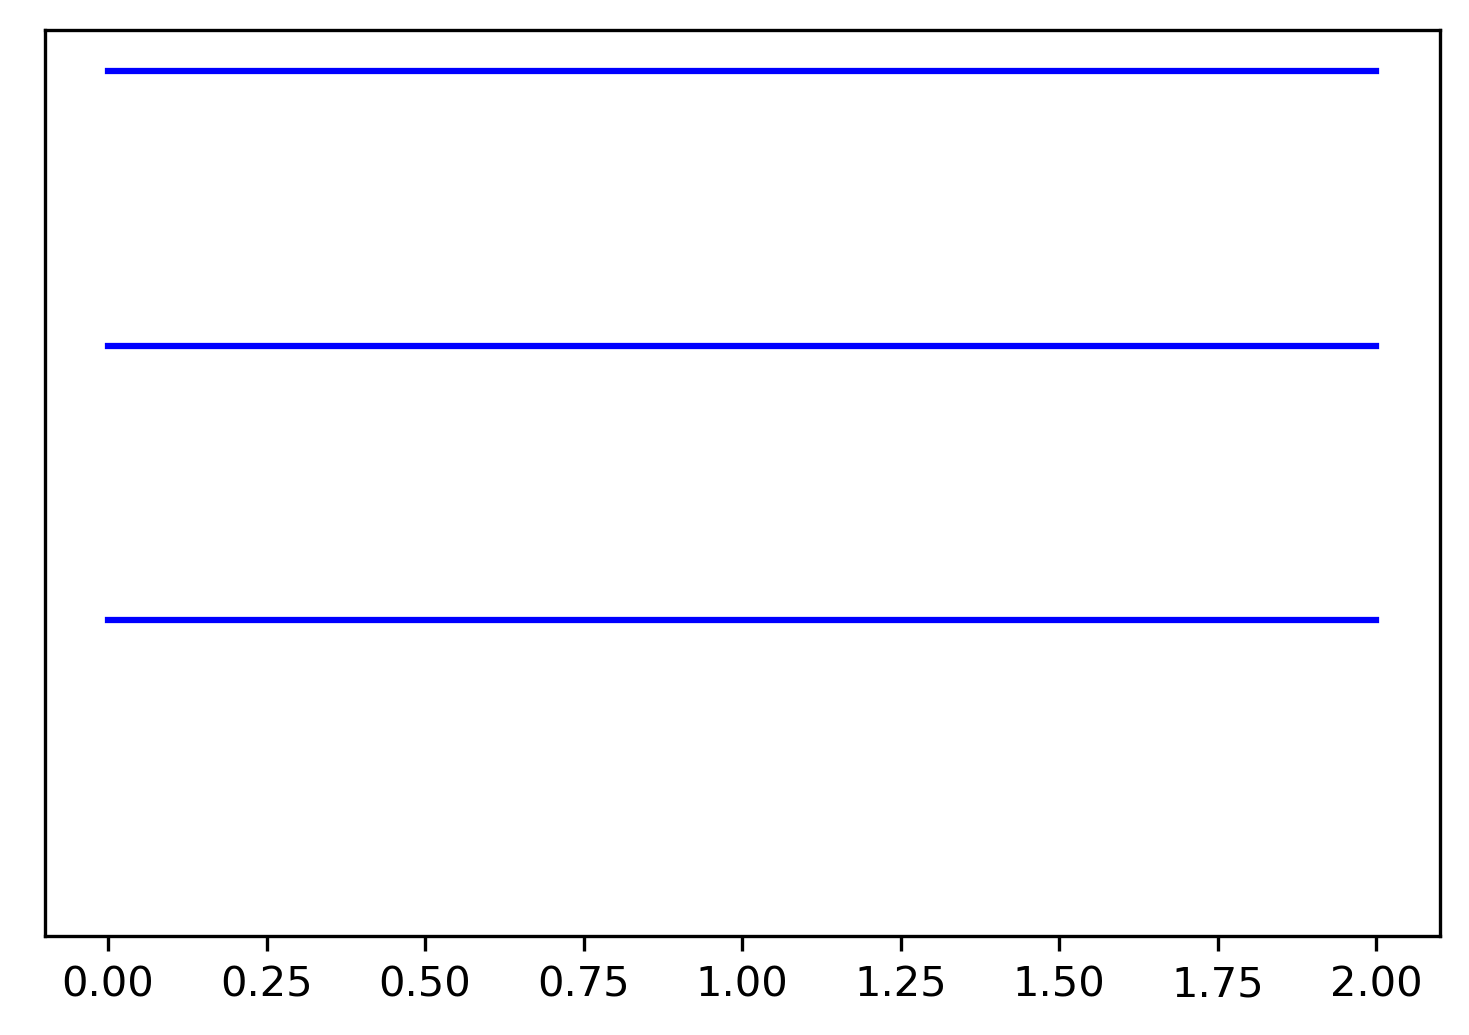

In [5]:
# Plot the barcode
dgms = dion.init_diagrams(hfp, filtration)
%matplotlib inline
mpl.rcParams['figure.dpi']=300
dion.plot.plot_bars(dgms[0], show = False)
plt.yticks([])
plt.show()

We now verify our computation of persistence diagram from the reduced matrix using the dionysus computation.

In [6]:
dgms[0]

Diagram with 4 points

One of the primary usage of understanding cycles is that you can obtain representative of the bars or points in the persistence diagrams. As showcased in another example using dual component of Homology, the representative cycles can be used find richer representations of the data set. In the following, we showcase how we compute representative 0-cycles to obtain a approximation for the connected components.

In [7]:
print("Dimension : Simplex vertices")

repcycles = []
for i,c in enumerate(hfp):
    if len(c)>0:
        #print(filtration[i],end=': ')
        print(filtration[i].dimension(), end=': ')
        birth = filtration[i].data
        deaths =[]
        vertices = []
        for x in c:
            simplex = filtration[x.index]
            deaths.append(filtration[x.index].data)
            for s in simplex:
                print(s, end=' ')
                vertices.append(s)
        death = np.max(np.unique(np.asarray(deaths)))
        vertices = np.unique(np.asarray(vertices))
        vertices = np.append(vertices,[filtration[i].dimension(), birth, death])
#         print(birth-death,'\n')
        if birth-death>0.0:
            print('a bar \n')
            repcycles.append(vertices)
        else:
            print('no bar \n')
        # print(" + ".join(["%d * %s" % (x.element, filtration[x.index]) for x in c]))

Dimension : Simplex vertices
1: 0 1 a bar 

1: 0 3 a bar 

1: 1 2 a bar 

2: 0 1 1 2 0 2 no bar 

2: 0 1 0 3 1 3 no bar 

2: 0 1 0 3 1 2 2 3 a bar 

3: 0 1 2 0 1 3 0 2 3 1 2 3 no bar 



Above printed array is a collection of vertices (or data points) that contribute to each bar in the persistence bar code but are only mere representatives. For instance, the represetatives does not tell us all the vertices correspond to a single bar in general.

We illustrate this using a slightly complex filtration shown below (add image)



In [8]:
# Build a custom filtration
simplicies = [([0], 0),([1],0), ([2],0), ([3],0), ([4],0), 
             ([0,1],1),([1,2],1), ([2,3],1), ([0,2],2),
             ([0,1,2],3),
             ([3,4],4)]
# Set up dionysus custom filtration
filtration = dion.Filtration()
for vertices, time in simplicies:
    filtration.append(dion.Simplex(vertices, time))
# compute persistent homology
hfp = dion.homology_persistence(filtration)


Now let us plot the diagrams and verifiy our computation of representative cycles

[Diagram with 5 points, Diagram with 1 points, Diagram with 0 points]


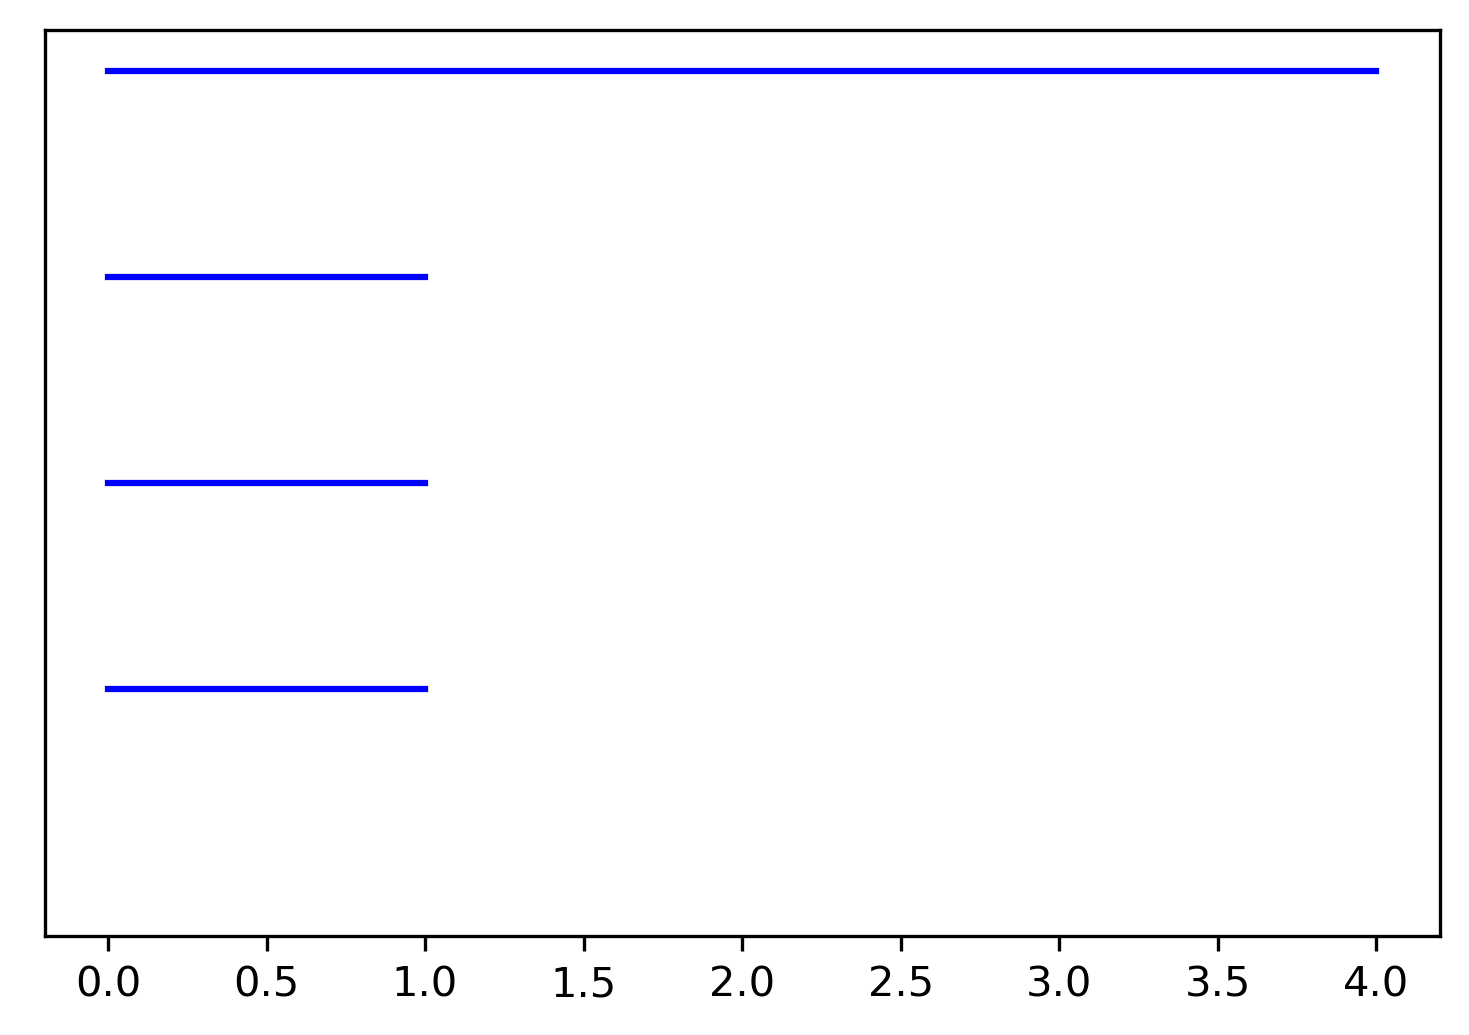

In [9]:
dgms = dion.init_diagrams(hfp, filtration)
print(dgms)
%matplotlib inline
mpl.rcParams['figure.dpi']=300

dion.plot.plot_bars(dgms[0], show = False)
plt.yticks([])
plt.show()

From the above we see that bar with a length = 4 has two representative cycles but it corresponds to a single connected component in the data set or filtration. To get all the vertices that compose the connected component reprseneted by the longest bar (or any bar), we need to do a little bit more work. 

First, let us print the filtration in terms of death and birth of cycles as we did before. Note that at the addition of simplex `<3,4>` we have the death of the longest bar of $\ell \in [0,4]$. However, a representative cycle obtained does not have the details of which vertices are all counted in the bar. 

In [10]:
# compute persistent homology
hfp = dion.homology_persistence(filtration)
 
for i,c in enumerate(hfp):
    print(i,'--',filtration[i],end=': ')
    print(" + ".join(["%d * %s" % (x.element, filtration[x.index]) for x in c]))

0 -- <0> 0: 
1 -- <1> 0: 
2 -- <2> 0: 
3 -- <3> 0: 
4 -- <4> 0: 
5 -- <0,1> 1: 1 * <0> 0 + 1 * <1> 0
6 -- <1,2> 1: 1 * <1> 0 + 1 * <2> 0
7 -- <2,3> 1: 1 * <2> 0 + 1 * <3> 0
8 -- <0,2> 2: 
9 -- <0,1,2> 3: 1 * <0,1> 1 + 1 * <1,2> 1 + 1 * <0,2> 2
10 -- <3,4> 4: 1 * <3> 0 + 1 * <4> 0


We can use the helper function provided to determine the vertices in any particular bar. Use the function `ComputeConnectedComponents`. 

A helper function `homcycles` is also provided with in the repository which incorporates both the functions.

In [11]:
import sys
sys.path.append('../')
from helpers import homcycles 

num_vertices = 5
hc = homcycles.homcycles(hfp, filtration, num_vertices) 
repcycles = hc.FindRepresentativeCycles()
print(repcycles)
concomps = hc.ComputeConnectedComponents()
print(concomps)

[array([0., 1., 0., 1., 0.]), array([1., 2., 0., 1., 0.]), array([2., 3., 0., 1., 0.]), array([0., 1., 2., 1., 3., 2.]), array([3., 4., 0., 4., 0.])]
Computing Bar 5 which was killed at 1.000
Vertex 1 is connected to {0, 1}
Elapsed Time is :  0.002081632614135742
Computing Bar 6 which was killed at 1.000
Vertex 2 is connected to {0, 1, 2}
Elapsed Time is :  0.0018301010131835938
Computing Bar 7 which was killed at 1.000
Vertex 3 is connected to {0, 1, 2, 3}
Elapsed Time is :  0.0019283294677734375
Computing Bar 10 which was killed at 4.000
Vertex 4 is connected to {0, 1, 2, 3, 4}
Elapsed Time is :  0.002096414566040039
[{'cc': {0, 1}, 'birth': 0.0, 'death': 1.0, 'index': 5}, {'cc': {0, 1, 2}, 'birth': 0.0, 'death': 1.0, 'index': 6}, {'cc': {0, 1, 2, 3}, 'birth': 0.0, 'death': 1.0, 'index': 7}, {'cc': {0, 1, 2, 3, 4}, 'birth': 0.0, 'death': 4.0, 'index': 10}]


In [12]:
# Example 3 : Custom filtration with non-trivial pairing that fools the tree search
# Build a custom filtration
simplicies = [([0], 0),([1],0), ([2],0), ([3],0), ([4],0),([5],0),([6],0), 
             ([0,1],1),([1,2],1), ([4,5],1),([3,4],1),([5,6],1),([0,5],2)
             ]
# Set up dionysus custom filtration
filtration = dion.Filtration()
for vertices, time in simplicies:
    filtration.append(dion.Simplex(vertices, time))

hfp = dion.homology_persistence(filtration)
num_vertices = 7
hc = homcycles.homcycles(hfp, filtration, num_vertices) 
repcycles = hc.FindRepresentativeCycles()
print(repcycles)
concomps = hc.ComputeConnectedComponents()
print(concomps)

[array([0., 1., 0., 1., 0.]), array([1., 2., 0., 1., 0.]), array([4., 5., 0., 1., 0.]), array([3., 4., 0., 1., 0.]), array([5., 6., 0., 1., 0.]), array([0., 3., 0., 2., 0.])]
Computing Bar 7 which was killed at 1.000
Vertex 1 is connected to {0, 1}
Elapsed Time is :  0.0021517276763916016
Computing Bar 8 which was killed at 1.000
Vertex 2 is connected to {0, 1, 2}
Elapsed Time is :  0.0020208358764648438
Computing Bar 9 which was killed at 1.000
Vertex 5 is connected to {4, 5}
Elapsed Time is :  0.002036571502685547
Computing Bar 10 which was killed at 1.000
Vertex 4 is connected to {3, 4, 5}
Elapsed Time is :  0.002098560333251953
Computing Bar 11 which was killed at 1.000
Vertex 6 is connected to {3, 4, 5, 6}
Elapsed Time is :  0.002267122268676758
Computing Bar 12 which was killed at 2.000
Vertex 5 is connected to {0, 1, 2, 3, 4, 5, 6}
Elapsed Time is :  0.002289295196533203
[{'cc': {0, 1}, 'birth': 0.0, 'death': 1.0, 'index': 7}, {'cc': {0, 1, 2}, 'birth': 0.0, 'death': 1.0, 'index